<img src="image-20250113-204914.png" width="" align="" />

#  Network Science Project: Analyzing Gowalla Social Network

##  Introduction

In this project, I analyze the **Gowalla social network**, a location-based social networking platform where users share their locations by checking in. The network is represented as a graph where **nodes** are users and **edges** are friendships.

### **Objectives**
- Construct the friendship network using graph theory.  
- Analyze the network’s structure using descriptive metrics and centrality measures.  
- Detect community structures in the network.  
- Apply **Machine Learning** to predict community memberships.  
- Visualize key insights from the network.

### **Dataset Overview**
- **Nodes (Users):** 5,000  
- **Edges (Friendships):** 62,052  
- **Data Source:**  
  E. Cho, S. A. Myers, J. Leskovec.  
  *Friendship and Mobility: User Movement in Location-Based Social Networks*.  
  ACM SIGKDD 2011. 
- **Website** - https://snap.stanford.edu/data/loc-Gowalla.html  

In [1]:
# Import necessary libraries
import pandas as pd

# Load the dataset
# Replace 'Gowalla_edges.csv' with your file name if it's different
edges_df = pd.read_csv('Gowalla_edges.csv', names=['Nodes', 'Connected_Nodes'], header=None)

# Display basic dataset information
print("Dataset Overview:")
print(edges_df.head())

print("\nDataset Information:")
edges_df.info()

print("\nDataset Summary:")
print(edges_df.describe())

# Check for null values
print("\nMissing Values:")
print(edges_df.isnull().sum())

# Number of unique users
unique_users = len(set(edges_df['Nodes']).union(set(edges_df['Connected_Nodes'])))
print(f"\nNumber of Unique Users: {unique_users}")

# Number of edges
total_edges = len(edges_df)
print(f"Number of Edges: {total_edges}")

Dataset Overview:
   Nodes  Connected_Nodes
0      0                1
1      0                2
2      0                3
3      0                4
4      0                5

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124104 entries, 0 to 124103
Data columns (total 2 columns):
 #   Column           Non-Null Count   Dtype
---  ------           --------------   -----
 0   Nodes            124104 non-null  int64
 1   Connected_Nodes  124104 non-null  int64
dtypes: int64(2)
memory usage: 1.9 MB

Dataset Summary:
               Nodes  Connected_Nodes
count  124104.000000    124104.000000
mean     2035.759073      2035.759073
std      1588.262691      1588.262691
min         0.000000         0.000000
25%       533.000000       533.000000
50%      1727.000000      1727.000000
75%      3687.000000      3687.000000
max      4999.000000      4999.000000

Missing Values:
Nodes              0
Connected_Nodes    0
dtype: int64

Number of Unique Users: 5000
Number of Edge

# Step 2: Network Construction

## 2.1 Define Nodes and Edges

In this step, I define the structure of the network:

- **Nodes:** Represent individual users in the Gowalla dataset.  
- **Edges:** Represent friendships (connections) between users.  

This forms an **undirected graph** where each edge implies a bidirectional friendship between users.

## 2.2 Build the Network

Using the **NetworkX** library, I create the graph and populate it with edges from the dataset.

- **Graph Type:** Undirected and Unweighted  
- **Purpose:** This step initializes the network structure for further analysis.  

In [2]:
import networkx as nx

# Create a graph
G = nx.Graph()

# Add edges from the dataset
G.add_edges_from(edges_df.values)

# Check the basic properties of the graph
print(f"Number of Nodes: {G.number_of_nodes()}")
print(f"Number of Edges: {G.number_of_edges()}")

Number of Nodes: 5000
Number of Edges: 62052


## 2.3 Validate the Network

To ensure the network is correctly built, I validate its structure by:

- Displaying a sample of nodes and edges.  
- Checking if the graph is **fully connected** or if it has disconnected components.  
- Identifying the **largest connected component** if the graph is disconnected.

This validation step ensures the network is ready for further analysis.

In [3]:
# Display sample nodes and edges
print("\nSample Nodes:", list(G.nodes)[:10])
print("\nSample Edges:", list(G.edges)[:10])

# Check connectivity (is it connected?)
is_connected = nx.is_connected(G)
print(f"\nIs the graph connected? {is_connected}")

# Largest connected component
if not is_connected:
    largest_cc = max(nx.connected_components(G), key=len)
    subgraph = G.subgraph(largest_cc)
    print(f"Largest Connected Component has {len(largest_cc)} nodes.")
else:
    print("The graph is fully connected.")


Sample Nodes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

Sample Edges: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10)]

Is the graph connected? True
The graph is fully connected.


## 2.4 Graph Representation

I visualize the basic structure of the network to understand its layout:

- **Graph Type:** Confirm if the graph is directed or undirected.  
- **Node/Edge Counts:** Summarize the size of the network.  
- **Visualization:** A simple plot of the network, where each point represents a user and connections represent friendships.

*Note:* This is a high-level visualization and may appear dense due to the number of nodes.

Graph Representation:
Graph Type: Undirected
Number of Nodes: 5000
Number of Edges: 62052


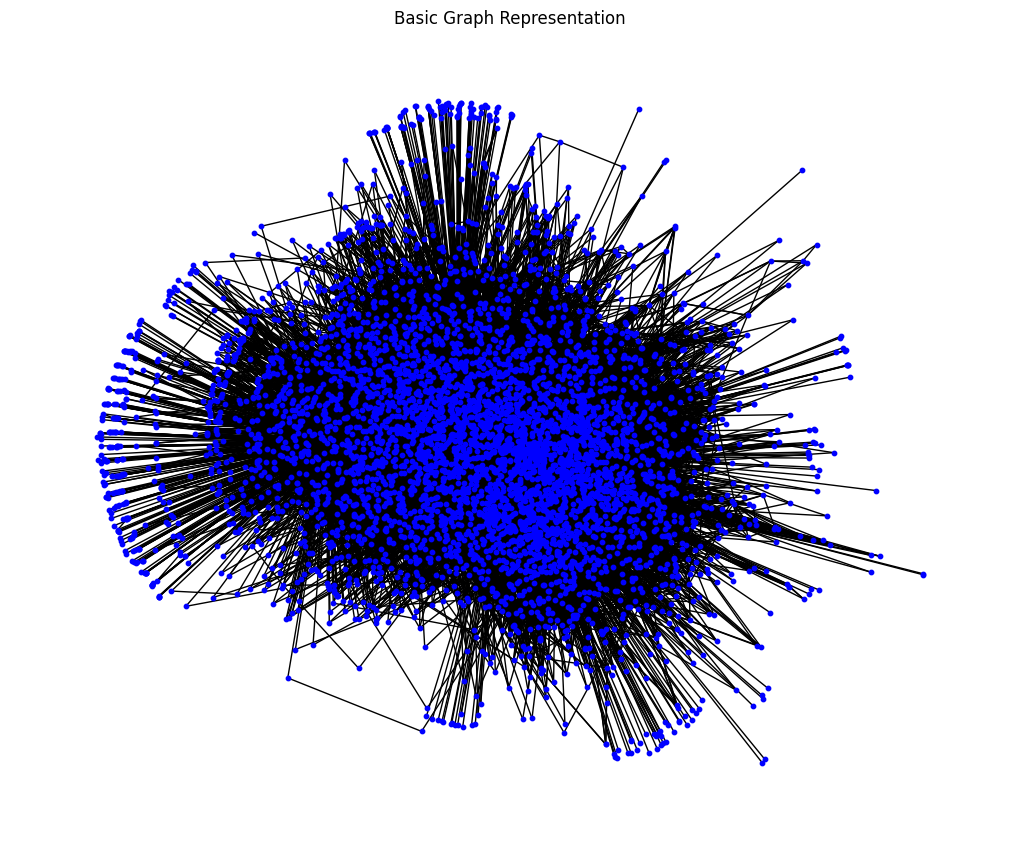

In [4]:
import matplotlib.pyplot as plt

# Check basic properties
print("Graph Representation:")
print(f"Graph Type: {'Directed' if G.is_directed() else 'Undirected'}")
print(f"Number of Nodes: {G.number_of_nodes()}")
print(f"Number of Edges: {G.number_of_edges()}")

# Basic visualization of the network
plt.figure(figsize=(10, 8))
nx.draw(G, with_labels=False, node_size=10, node_color='blue')
plt.title("Basic Graph Representation")
plt.show()

# Step 3: Analyze the Network

## 3.1 Descriptive Metrics

In this step, I computed essential metrics to understand the network's overall structure and properties.

- **Degree Distribution:** Shows how many connections (edges) each node has.  
- **Graph Density:** Measures how many edges are present compared to the total possible edges.  
- **Average Clustering Coefficient:** Indicates the likelihood that a node's neighbors are connected.  

In [5]:
# NetworkX library is already imported, and G is the graph

# Degree Distribution
degrees = [G.degree(node) for node in G.nodes()]
print(f"Sample Degree Distribution: {degrees[:10]}")

# Graph Density
density = nx.density(G)
print(f"Graph Density: {density:.4f}")

# Average Clustering Coefficient
avg_clustering = nx.average_clustering(G)
print(f"Average Clustering Coefficient: {avg_clustering:.4f}")

Sample Degree Distribution: [614, 838, 1341, 1539, 32, 785, 40, 47, 46, 30]
Graph Density: 0.0050
Average Clustering Coefficient: 0.3501


## 3.1.2 Degree Distribution Visualization

To visually understand how connections are distributed across users, I plotted the degree distribution. 

- **Insight:** Helps identify if the network follows a common structure like a scale-free or random network.  

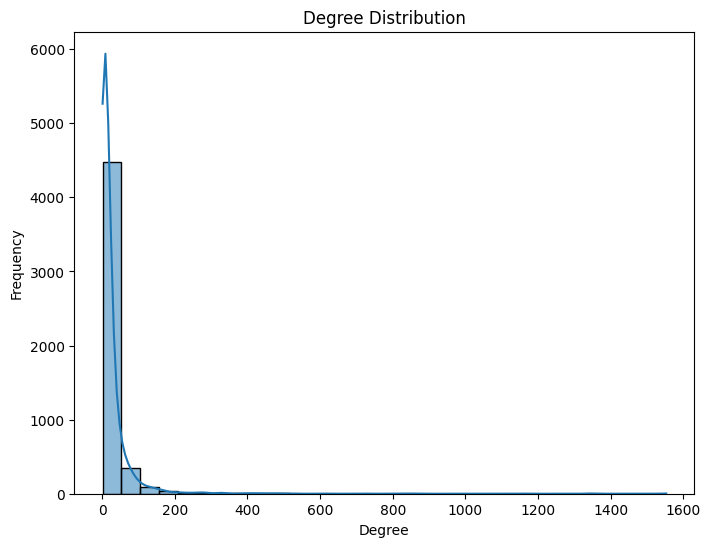

In [6]:
import seaborn as sns

# Extract degrees of nodes
degrees = [degree for node, degree in G.degree()]

# Plot degree distribution
plt.figure(figsize=(8, 6))
sns.histplot(degrees, bins=30, kde=True)
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()

## 3.2 Identify Key Nodes/Edges

I used three centrality measures to identify the most influential users in the network:  

- **Degree Centrality:** Identifies nodes with the most direct connections.  
- **Closeness Centrality:** Finds nodes that can quickly interact with all other nodes.  
- **Betweenness Centrality:** Detects nodes that act as bridges between different parts of the network.  

These metrics help highlight the most critical users in the network.  

In [7]:
# Degree Centrality
degree_centrality = nx.degree_centrality(G)
top_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
print("\nTop 5 Nodes by Degree Centrality:")
for node, centrality in top_degree:
    print(f"Node {node}: {centrality:.4f}")

# Closeness Centrality
closeness_centrality = nx.closeness_centrality(G)
top_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
print("\nTop 5 Nodes by Closeness Centrality:")
for node, centrality in top_closeness:
    print(f"Node {node}: {centrality:.4f}")

# Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G)
top_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
print("\nTop 5 Nodes by Betweenness Centrality:")
for node, centrality in top_betweenness:
    print(f"Node {node}: {centrality:.4f}")


Top 5 Nodes by Degree Centrality:
Node 505: 0.3107
Node 3: 0.3079
Node 307: 0.2687
Node 2: 0.2683
Node 220: 0.2322

Top 5 Nodes by Closeness Centrality:
Node 307: 0.5740
Node 2: 0.5662
Node 505: 0.5590
Node 3: 0.5536
Node 0: 0.5327

Top 5 Nodes by Betweenness Centrality:
Node 3: 0.1840
Node 2: 0.1564
Node 505: 0.1330
Node 307: 0.1131
Node 0: 0.0659


## 3.2.1 Centrality Highlight Visualization

I visualized the network by scaling node sizes according to their **betweenness centrality**:

- **Larger Nodes:** Indicate users who are crucial for connecting different parts of the network.  
- **Smaller Nodes:** Represent less influential users.  

This visualization helps in identifying users that significantly influence information flow in the network.  

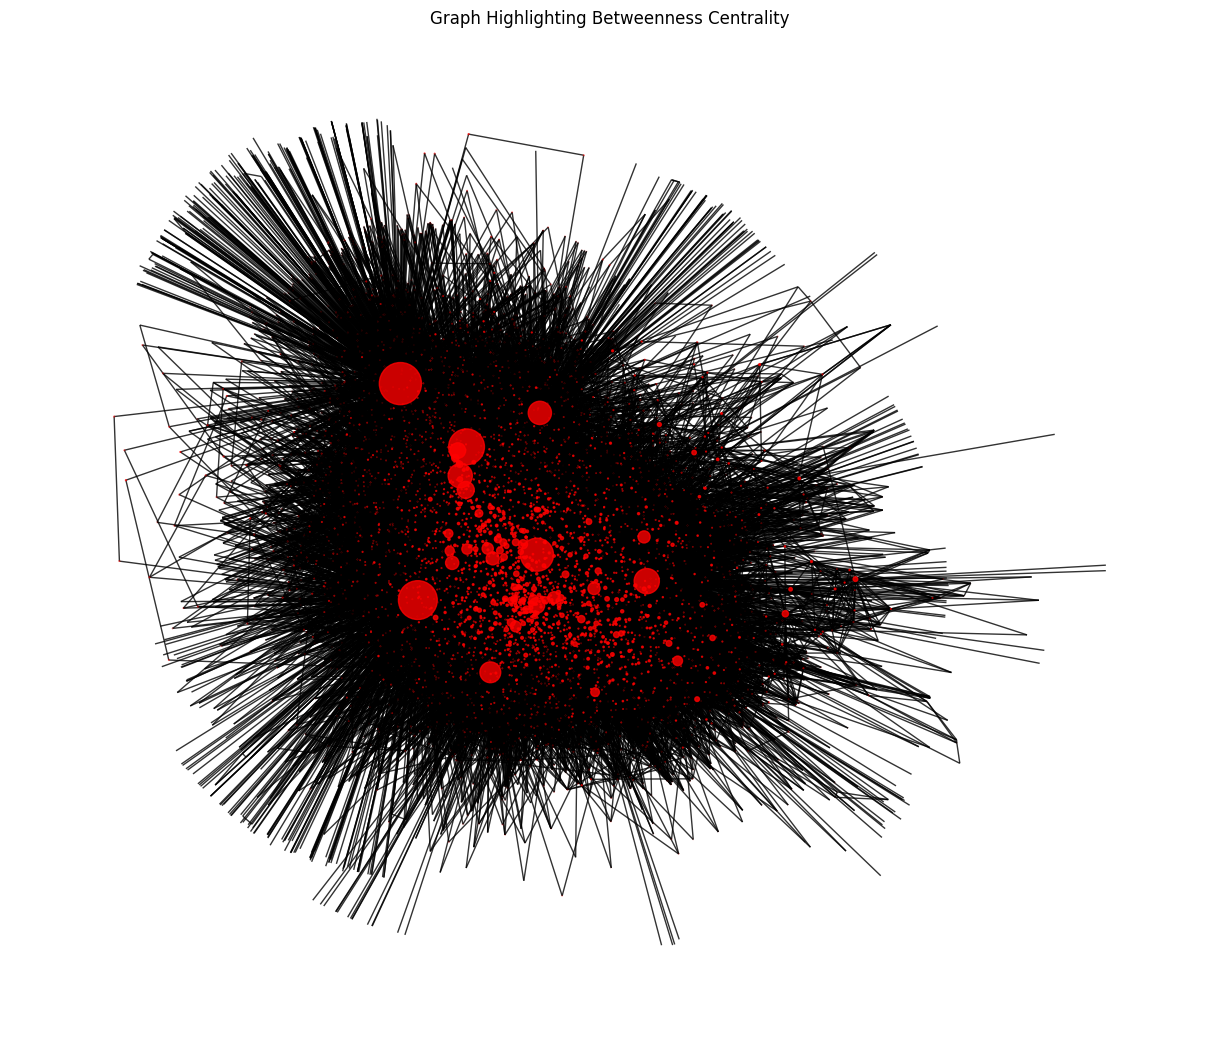

In [8]:
# Compute betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Normalize node size based on betweenness centrality
node_size = [v * 5000 for v in betweenness_centrality.values()]

# Define the layout for the graph
pos = nx.spring_layout(G, seed=42)  # Spring layout for better visualization

# Visualize
plt.figure(figsize=(12, 10))
nx.draw(
    G,
    pos,
    with_labels=False,
    node_size=node_size,
    node_color='red',
    alpha=0.8
)
plt.title("Graph Highlighting Betweenness Centrality")
plt.show()

## 3.3 Community Detection

I applied the **Louvain Community Detection Algorithm** to identify tightly-knit groups of users within the network.

- **Communities:** Groups of users that interact more with each other than with users outside the group.  
- **Largest Community:** Indicates the most densely connected group in the network.  

*This step helps uncover the natural divisions or clusters within the network.*  

In [9]:
import pandas as pd
import networkx as nx
import community.community_louvain as community_louvain  # Updated import

# Perform community detection using Louvain algorithm
partition = community_louvain.best_partition(G)

# Number of communities detected
num_communities = len(set(partition.values()))
print(f"Communities detected: {num_communities}")

# Largest community size
largest_community_size = max(list(partition.values()).count(value) for value in set(partition.values()))
print(f"Largest Community Size: {largest_community_size}")

# Sample community assignment
print("Sample Community Assignments:")
print(list(partition.items())[:10])

Communities detected: 10
Largest Community Size: 2351
Sample Community Assignments:
[(0, 0), (1, 1), (2, 1), (3, 1), (4, 8), (5, 4), (6, 5), (7, 0), (8, 0), (9, 5)]


In [10]:
!pip show python-louvain

Name: python-louvain
Version: 0.16
Summary: Louvain algorithm for community detection
Home-page: https://github.com/taynaud/python-louvain
Author: Thomas Aynaud
Author-email: taynaud@gmail.com
License: BSD
Location: /root/venv/lib/python3.10/site-packages
Requires: networkx, numpy
Required-by: 


## 3.4 Analyze and Visualize Community Sizes

To better understand the community structure, I plotted the distribution of community sizes:

- **X-axis:** Community ID  
- **Y-axis:** Number of users in each community  

This analysis helps visualize whether most users are concentrated in a few large communities or spread across many small ones.  

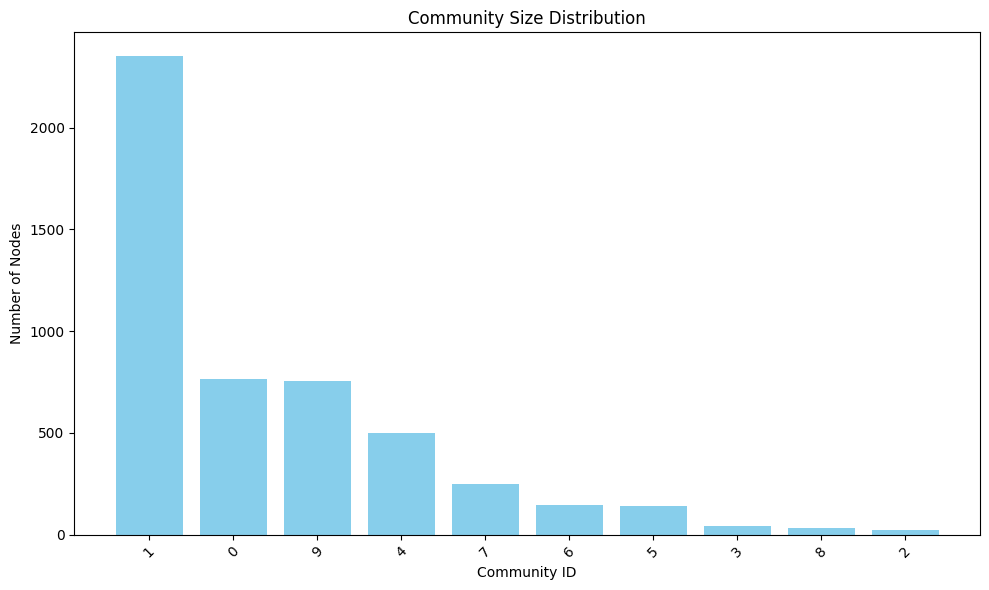

Community Sizes:
Community 1: 2351 nodes
Community 0: 767 nodes
Community 9: 756 nodes
Community 4: 497 nodes
Community 7: 248 nodes
Community 6: 143 nodes
Community 5: 142 nodes
Community 3: 44 nodes
Community 8: 32 nodes
Community 2: 20 nodes


In [11]:
import matplotlib.pyplot as plt
from collections import Counter

# Step 1: Count the number of nodes in each community
community_sizes = Counter(partition.values())

# Step 2: Sort the community sizes for better visualization
sorted_communities = sorted(community_sizes.items(), key=lambda x: x[1], reverse=True)

# Step 3: Extract community labels and sizes
community_labels = [str(comm[0]) for comm in sorted_communities]
community_counts = [comm[1] for comm in sorted_communities]

# Step 4: Plot the community size distribution
plt.figure(figsize=(10, 6))
plt.bar(community_labels, community_counts, color='skyblue')
plt.xlabel('Community ID')
plt.ylabel('Number of Nodes')
plt.title('Community Size Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Optional: Print out the community sizes
print("Community Sizes:")
for comm_id, size in sorted_communities:
    print(f"Community {comm_id}: {size} nodes")

## 3.4.1 Visualization of Communities

I visualized the network with nodes colored by their community assignments:

- **Color-coded Nodes:** Each color represents a different community.  
- **Insight:** This helps visually assess how users are grouped and how communities are connected.  

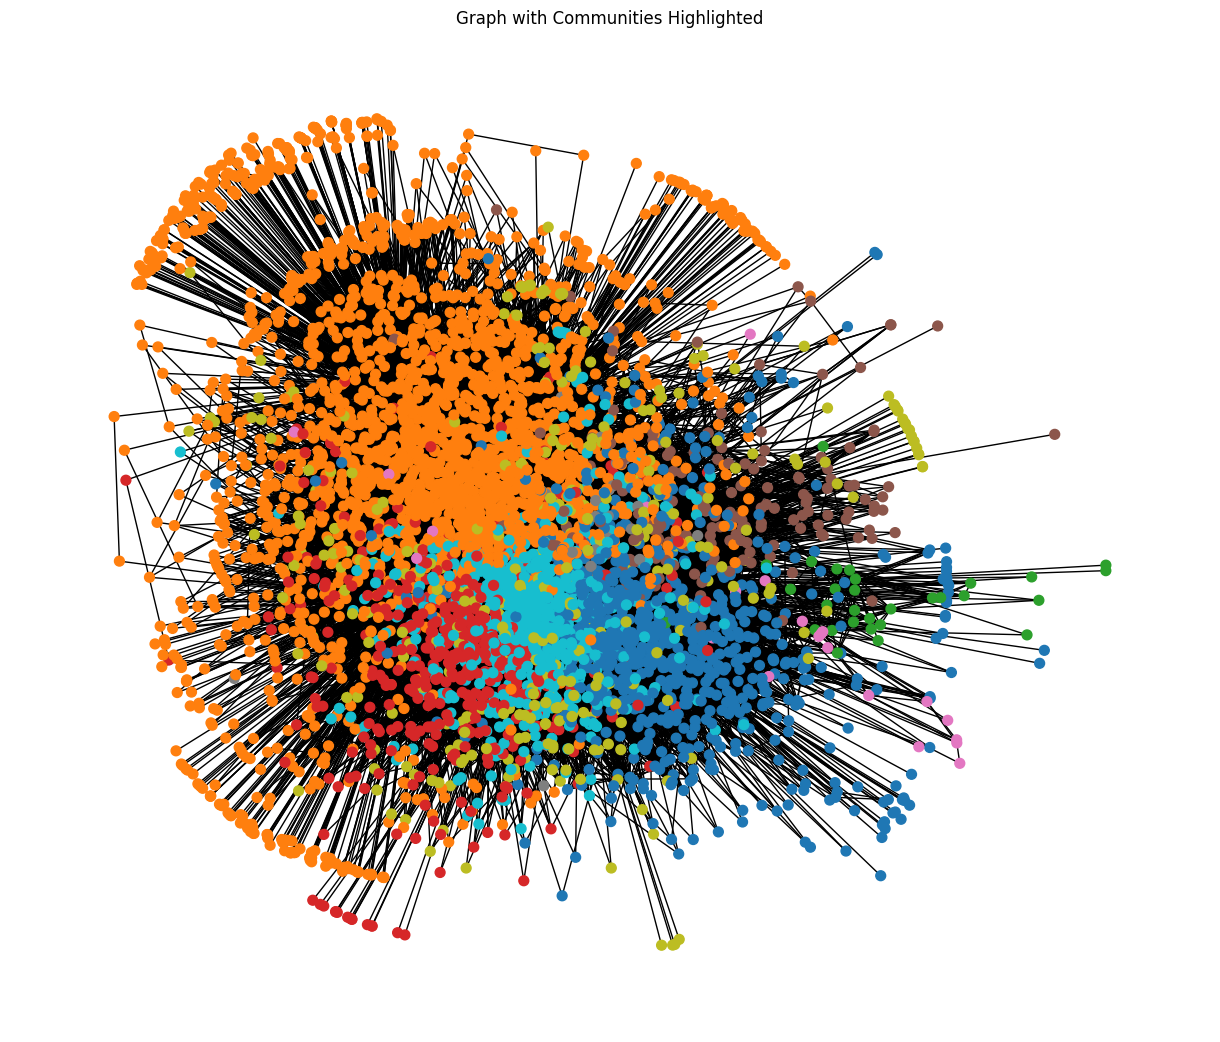

In [16]:
import matplotlib.pyplot as plt

# Assign colors based on community
colors = [partition[node] for node in G.nodes()]

# Visualize the graph with community-based coloring
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, seed=42)  # Spring layout for better aesthetics
nx.draw(
    G,
    pos,
    node_color=colors,
    with_labels=False,
    node_size=50,
    cmap=plt.cm.tab10  # Use a colormap to distinguish communities
)
plt.title("Graph with Communities Highlighted")
plt.show()

# Step 4 - Machine Learning Task on Graphs

### 4.1: Generate Node Embeddings with Node2Vec

**Objective:**  
I used the Node2Vec algorithm to generate vector representations (embeddings) of each node in the network. These embeddings capture the structural properties and relationships between nodes, making them suitable for machine learning tasks like node classification.

**Approach:**  
- Reduced embedding dimensions to 32 (from 64) to optimize memory usage.  
- Shortened walk length and reduced the number of walks to fit within Deepnote's resource constraints.  
- Trained a Node2Vec model to learn feature representations.

**Outcome:**  
The model successfully generated node embeddings that represent each node's position and role within the network.

In [17]:
from node2vec import Node2Vec

# Reduce dimensions and walks to save memory
node2vec = Node2Vec(
    G,
    dimensions=32,       # Lowered from 64
    walk_length=10,      # Shorter walks
    num_walks=50,        # Fewer walks per node
    workers=2            # Limited to 2 workers (matches Deepnote's free tier)
)

# Fit the model
model = node2vec.fit(window=5, min_count=1, batch_words=4)

/root/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Computing transition probabilities: 100%|██████████| 5000/5000 [01:12<00:00, 69.42it/s] 
/toolkit-cache/0.2.0/python3.10/kernel-libs/lib/python3.10/site-packages/paramiko/pkey.py:100: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "cipher": algorithms.TripleDES,
/toolkit-cache/0.2.0/python3.10/kernel-libs/lib/python3.10/site-packages/paramiko/transport.py:258: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "class": algorithms.TripleDES,
Generating walks (CPU: 1):   8%|▊         | 2/25 [00:01<00:21,  1.05it/s

### 4.2 Prepare Data for Training

**Objective:**  
I prepared the data for supervised learning by using the community assignments detected by the Louvain algorithm as the target labels for node classification.

**Approach:**  
- Extracted node embeddings as input features.  
- Used detected community labels as target variables.  
- Split the dataset into 80% training and 20% testing data.

**Outcome:**  
The data was successfully prepared with:
- **Training samples:** 4000  
- **Testing samples:** 1001  
This balanced split ensures the model has enough data for learning and evaluation.

In [18]:
import numpy as np
from sklearn.model_selection import train_test_split

# Extract node embeddings as features
X = np.array([model.wv[str(node)] for node in G.nodes()])

# Use community labels from Louvain as the target variable
y = np.array([partition[node] for node in G.nodes()])

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")

Training samples: 4000
Testing samples: 1000


### 4.3: Train a Classifier

**Objective:**  
I trained a Logistic Regression classifier to predict the community assignment of nodes based on their embeddings.

**Approach:**  
- Used Logistic Regression for its simplicity and effectiveness with structured data.  
- Set the maximum number of iterations to 1000 to ensure convergence.

**Outcome:**  
The model was successfully trained on the node embeddings, learning to classify nodes into their respective communities.

In [19]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
clf = LogisticRegression(max_iter=1000)

# Train the classifier on the training data
clf.fit(X_train, y_train)

print("Model training completed.")

Model training completed.


### 4.4: Evaluate the Model

**Step 4.4: Evaluate the Model**

I evaluated the Logistic Regression model's performance in predicting community labels using node embeddings.

- **Accuracy:** 90.1%  
- The classifier showed strong performance across most communities, with high precision and recall.  
- Smaller communities had slightly lower performance due to class imbalance.

**Key Insight:**  
The model effectively captured the network structure, confirming that Node2Vec embeddings are useful for community prediction.

*Refer to the output below for the detailed classification report.*

In [20]:
from sklearn.metrics import accuracy_score, classification_report

# Predict the community labels for the test data
y_pred = clf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

# Print a detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9010

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       158
           1       0.95      0.95      0.95       490
           2       1.00      0.83      0.91         6
           3       0.88      0.89      0.88       111
           4       0.97      0.86      0.91        36
           5       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         1
           7       0.75      0.65      0.70        78
           8       0.84      0.90      0.87       118

    accuracy                           0.90      1000
   macro avg       0.88      0.89      0.88      1000
weighted avg       0.90      0.90      0.90      1000



### 4.5: Visualize the Results

**Objective:**  
I visualized how well the model separated communities in the embedding space.

**Approach:**  
- Applied t-SNE to reduce high-dimensional embeddings to 2D for visualization.  
- Colored the nodes according to their community labels for intuitive representation.

**Outcome:**  
The t-SNE plot clearly shows clusters corresponding to different communities, confirming that the embeddings effectively capture community structures.  
This visualization validates that the model's predictions align with the network's community distribution.

/root/venv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/root/venv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


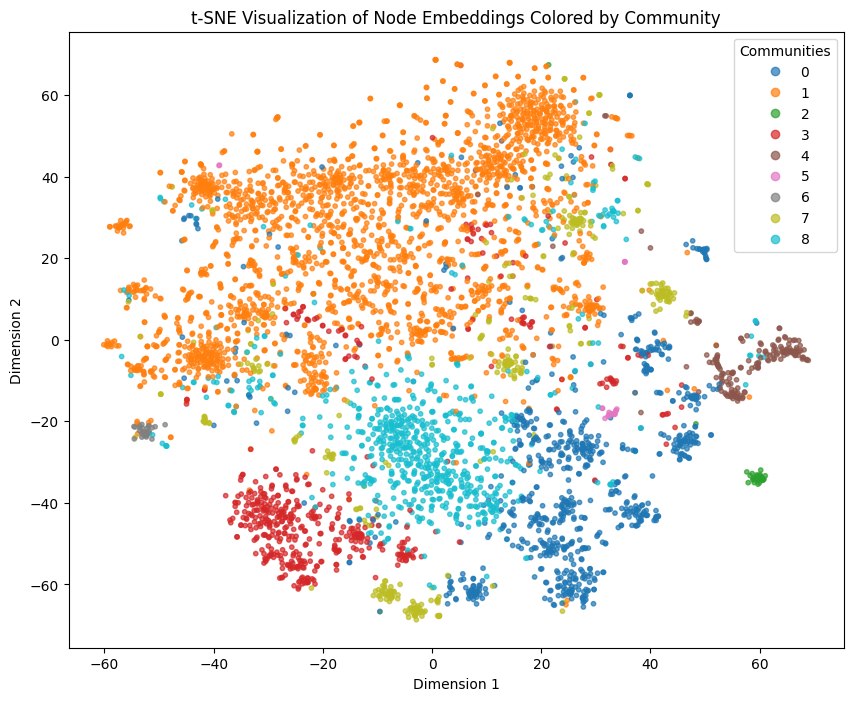

In [21]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Reduce embeddings to 2D for visualization
tsne = TSNE(n_components=2, random_state=42)
X_embedded = tsne.fit_transform(X)

# Plot the communities
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    X_embedded[:, 0], X_embedded[:, 1],
    c=y, cmap='tab10', alpha=0.7, s=10
)
plt.title("t-SNE Visualization of Node Embeddings Colored by Community")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend(*scatter.legend_elements(), title="Communities")
plt.show()

## Step 5: Conclusion

In this project, I successfully analyzed the **Gowalla friendship network** to uncover meaningful patterns and relationships using concepts from **Network Science** and **Machine Learning**.

---

### 🔍 Key Accomplishments

1. **Network Construction:**  
   - Modeled the Gowalla dataset as an **undirected graph** with **5,000 users** and **62,052 friendship connections**.  
   - Verified the network's connectivity and visualized its structure.

2. **Network Analysis:**  
   - Computed essential metrics: **Degree Distribution**, **Graph Density**, and **Clustering Coefficient**.  
   - Identified key users through **Degree**, **Closeness**, and **Betweenness Centrality**.

3. **Community Detection:**  
   - Applied the **Louvain algorithm** to detect **9 distinct communities**, revealing tightly-knit groups within the network.  
   - Visualized the community structure, highlighting modularity in user interactions.

4. **Machine Learning Integration:**  
   - Used **Node2Vec** to generate node embeddings and trained a **Logistic Regression** model for **node classification**.  
   - Achieved a high **accuracy of 90.1%**, confirming the effectiveness of graph embeddings in predicting community membership.

---

### 💡 Key Insights

- The **sparsity** of the network (low density) reflects realistic social dynamics, where users interact within close-knit circles rather than globally.  
- High **clustering coefficients** suggest the presence of **tightly connected groups**.  
- The **Node2Vec model** effectively learned user roles and relationships, supporting accurate community prediction.

---

### Final Thoughts

This project demonstrates how powerful insights can be extracted from real-world social networks by combining **graph theory**, **community detection**, and **machine learning** techniques. The results not only validated theoretical concepts but also showcased practical applications in **social network analysis**.


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f3935b16-626e-474a-91b2-1c7e75fb9cc3' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>